사용할 PDF 파일 확인하기

In [5]:
from glob import glob

for g in glob("pdf/*.pdf"):
    print(g)

pdf\A Coupled Molecular DynamicsKinetic Monte Carlo Approach for Protonation Dynamics in Extended Systems.pdf
pdf\Kinetic Monte Carlo Simulations of Sodium Ion Transport in NaSICON Electrodes.pdf
pdf\Modeling of Space-Charge Layers in Solid-State Electrolytes A Kinetic Monte Carlo Approach and Its Validation.pdf


In [9]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

def read_pdf_and_split_text(pdf_path, chunk_size=1000, chunk_overlap=200):
    """
    Read a PDF file and split it into smaller chunks.
    
    Args:
        pdf_path (str): Path to the PDF file.
        chunk_size (int): Size of each chunk.
        chunk_overlap (int): Overlap between chunks.
    
    Returns:
        list: List of split documents.
    """
    
    pdf_loader = PyPDFLoader(pdf_path)
    data_from_pdf = pdf_loader.load()

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size, 
        chunk_overlap=chunk_overlap,
    )

    splits = text_splitter.split_documents(data_from_pdf)
    return splits

pyPDFLoader 사용하기

In [ ]:
from langchain_community.document_loaders import PyPDFLoader 

loader = PyPDFLoader("C:/Users/seongjinkim/OneDrive_POSTECH/Projects/01_2026 AI Co-Scientist Challenge Korea/KOKOA/pdf/A Coupled Molecular DynamicsKinetic Monte Carlo Approach for Protonation Dynamics in Extended Systems.pdf")
data = loader.load()

print(data)

[Document(metadata={'producer': 'Acrobat Distiller 8.1.0 (Windows); modified using iText 4.2.0 by 1T3XT', 'creator': 'Arbortext Advanced Print Publisher 10.0.1465/W Unicode', 'creationdate': '2014-10-06T10:02:45-04:00', 'moddate': '2026-01-05T06:09:40-08:00', 'jcalibrarybuild': '3.6.i5 HF03', 'title': 'ct500482k 1..8', 'source': 'C:/Users/seongjinkim/OneDrive_POSTECH/Projects/01_2026 AI Co-Scientist Challenge Korea/KOKOA/pdf/A Coupled Molecular DynamicsKinetic Monte Carlo Approach for Protonation Dynamics in Extended Systems.pdf', 'total_pages': 8, 'page': 0, 'page_label': '1'}, page_content='A Coupled Molecular Dynamics/Kinetic Monte Carlo Approach for\nProtonation Dynamics in Extended Systems\nGabriel Kabbe,† Christoph Wehmeyer,‡ and Daniel Sebastiani*,†\n†Institute of Chemistry for Physical Chemistry, Martin-Luther-University Halle-Wittenberg, von-Danckelmann-Platz 4, 06120 Halle,\nGermany\n‡Institute of Mathematics, Freie Universität Berlin, Arnimallee 14, 14195 Berlin, Germany\n*

출력된 텍스트를 청크로 나누기

In [7]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100,
)
all_splits = text_splitter.split_documents(data)

청크 출력하기

In [8]:
for i, split in enumerate(all_splits):
    print(f"Processing split {i+1}/{len(all_splits)}")
    print(split)

Processing split 1/44
page_content='A Coupled Molecular Dynamics/Kinetic Monte Carlo Approach for
Protonation Dynamics in Extended Systems
Gabriel Kabbe,† Christoph Wehmeyer,‡ and Daniel Sebastiani*,†
†Institute of Chemistry for Physical Chemistry, Martin-Luther-University Halle-Wittenberg, von-Danckelmann-Platz 4, 06120 Halle,
Germany
‡Institute of Mathematics, Freie Universität Berlin, Arnimallee 14, 14195 Berlin, Germany
*S Supporting Information
ABSTRACT: We propose a multiscale simulation scheme that
combines ﬁrst-principles Molecular Dynamics (MD) and kinetic
Monte Carlo (kMC) simulations to describe ion transport
processes. On the one hand, the molecular dynamics trajectory
provides an accurate atomist ic structure and its temporal
evolution, and on the other hand, the Monte Carlo part models
the long-time motion of the acidic protons. Our hybrid approach
deﬁnes a coupling scheme between the MD and kMC simulations
that allows the kMC topology to adapt continuously to the' metad

all_splits의 데이터 타입 확인하기

In [9]:
print(type(all_splits[0]))

<class 'langchain_core.documents.base.Document'>


임베딩 모델 테스트하기

In [2]:
embeddings.embed_query("Hello world")

[-0.04013955220580101,
 0.0322122648358345,
 -0.028215892612934113,
 0.024629678577184677,
 -0.033103689551353455,
 -0.04166660085320473,
 -0.05686059221625328,
 -0.042782943695783615,
 0.008332435041666031,
 -0.001196549623273313,
 -0.008856826461851597,
 0.013744584284722805,
 0.028526756912469864,
 -0.013167551718652248,
 0.022318458184599876,
 2.5575378458597697e-05,
 0.026341870427131653,
 -0.02766372822225094,
 -0.03086935542523861,
 -0.03428350016474724,
 -0.044395219534635544,
 -0.010097257792949677,
 0.01856910064816475,
 -0.025874493643641472,
 0.012294463813304901,
 0.05799943208694458,
 -0.035337384790182114,
 0.00010736712283687666,
 -0.00024242127256002277,
 -0.055141448974609375,
 0.04237139970064163,
 0.0777888149023056,
 -0.010337809100747108,
 -0.04496583715081215,
 -0.023880455642938614,
 -0.03335672989487648,
 -0.0037362994626164436,
 -0.0068077221512794495,
 -0.060410261154174805,
 0.018580792471766472,
 0.006723868194967508,
 0.019089071080088615,
 0.0181405227631

임베딩 모델 선언하기

In [3]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(
    model_name="BAAI/bge-m3",
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True}
)

c:\Users\seongjinkim\AppData\Local\anaconda3\envs\kokoa\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


크로마 DB 생성하고 데이터 불러오기

In [4]:
from langchain_chroma import Chroma
import os

persist_directory = "./chroma_store"

if not os.path.exists(persist_directory):
    print("Creating new Chroma store")
    vectorstore = Chroma.from_documents(
        documents=all_splits,
        embedding=embeddings,
        persist_directory=persist_directory,
    )
else:
    print("Loading existing Chroma store")
    vectorstore = Chroma(
        persist_directory=persist_directory,
        embedding_function=embeddings,
    )

Loading existing Chroma store


유사도 높은 청크 가져와서 질문하기

In [13]:
retriever = vectorstore.as_retriever(k=3)
docs = retriever.invoke("Please tell me how to upgrade kMC simulation that can more accurately match the experimental value of ion conductivity of solid electrolytes.")

for d in docs:
    print(d)
    print("-----")

page_content='A Coupled Molecular Dynamics/Kinetic Monte Carlo Approach for
Protonation Dynamics in Extended Systems
Gabriel Kabbe,† Christoph Wehmeyer,‡ and Daniel Sebastiani*,†
†Institute of Chemistry for Physical Chemistry, Martin-Luther-University Halle-Wittenberg, von-Danckelmann-Platz 4, 06120 Halle,
Germany
‡Institute of Mathematics, Freie Universität Berlin, Arnimallee 14, 14195 Berlin, Germany
*S Supporting Information
ABSTRACT: We propose a multiscale simulation scheme that
combines ﬁrst-principles Molecular Dynamics (MD) and kinetic
Monte Carlo (kMC) simulations to describe ion transport
processes. On the one hand, the molecular dynamics trajectory
provides an accurate atomist ic structure and its temporal
evolution, and on the other hand, the Monte Carlo part models
the long-time motion of the acidic protons. Our hybrid approach
deﬁnes a coupling scheme between the MD and kMC simulations
that allows the kMC topology to adapt continuously to the' metadata={'producer': 'Acro

In [5]:
retriever = vectorstore.as_retriever(k=3)
prompt1 = """
Please let me know the research results of kMC simulation 
that can more accurately match the experimental values of 
ion conductivity of solid electrolytes.
""" 
docs = retriever.invoke(prompt1)

for d in docs:
    print(d.metadata)
    print(d.page_content)
    print("-"*100)

{'title': 'ct500482k 1..8', 'source': 'C:/Users/seongjinkim/OneDrive_POSTECH/Projects/01_2026 AI Co-Scientist Challenge Korea/KOKOA/pdf/A Coupled Molecular DynamicsKinetic Monte Carlo Approach for Protonation Dynamics in Extended Systems.pdf', 'jcalibrarybuild': '3.6.i5 HF03', 'total_pages': 8, 'moddate': '2026-01-05T06:09:40-08:00', 'page': 0, 'page_label': '1', 'creationdate': '2014-10-06T10:02:45-04:00', 'creator': 'Arbortext Advanced Print Publisher 10.0.1465/W Unicode', 'producer': 'Acrobat Distiller 8.1.0 (Windows); modified using iText 4.2.0 by 1T3XT'}
A Coupled Molecular Dynamics/Kinetic Monte Carlo Approach for
Protonation Dynamics in Extended Systems
Gabriel Kabbe,† Christoph Wehmeyer,‡ and Daniel Sebastiani*,†
†Institute of Chemistry for Physical Chemistry, Martin-Luther-University Halle-Wittenberg, von-Danckelmann-Platz 4, 06120 Halle,
Germany
‡Institute of Mathematics, Freie Universität Berlin, Arnimallee 14, 14195 Berlin, Germany
*S Supporting Information
ABSTRACT: We pr

언어 모델 설정하기

In [9]:
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

llm = ChatOllama(
    model="deepseek-r1:8b",
    reasoning=True,
    # reasoning='high', # this is only supported `gpt-oss`
    temperature=0.3,
    )

messages = [
    SystemMessage("You are a scientist who is good at reasoning.")
    ]

while True:
    user_input = input("User: ")
    
    if user_input.lower() == "exit":
        break
    
    messages.append(HumanMessage(content=user_input))
    
    response = llm.invoke(messages)
    
    messages.append(response)
    
    print("Assistant:", response.content)

Assistant: Hello! It's good to connect with someone interested in reasoning and science. How can I assist you today? 😊
Assistant: Okay, let's delve into Kinetic Monte Carlo (KMC) simulations. It's a powerful method for simulating systems where events occur randomly over time, governed by stochastic processes.

**Think of it as a way to "play out" the probabilities of different things happening in a system, step-by-step, keeping track of the time it takes for each event.**

Here's a breakdown of the key concepts:

1.  **Monte Carlo (MC) Method:** At its core, Monte Carlo is a computational technique that uses random sampling to solve problems or simulate systems. It relies on repeated random draws to estimate numerical results or model complex behavior.

2.  **"Kinetic" Aspect:** This differentiates KMC from other types of Monte Carlo simulations (like some for numerical integration or optimization). The "kinetic" part refers to the fact that the system involves processes with specific 

PDF 파일 읽고 텍스트 임베딩하기

In [12]:
import os
from typing import Annotated, List, Dict, Union, TypedDict, Any, Optional
from pydantic import BaseModel

from langchain_chroma import Chroma
from langchain_community.document_loaders import PyPDFLoader


persist_directory = "./chroma_db"



환경 설정 및 라이브러리 로드

In [18]:
import os
import subprocess
import sys
import time
import glob
import textwrap
from typing import Annotated, List, Dict, Union, TypedDict, Any, Optional
from pydantic import BaseModel, Field

from langchain_huggingface import HuggingFaceEmbeddings
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_chroma import Chroma
from langchain_community.document_loaders import PyPDFLoader
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver

import warnings
warnings.filterwarnings("ignore")

class Config:
    MODEL_NAME = "deepseek-r1:8b"
    TEMPERATURE = 0.1 # 과학적 코딩이므로 창의성보다는 정확성 중시
    EMBEDDING_MODEL = "BAAI/bge-m3" # RAG용 임베딩 모델
    K_RETRIEVAL = 3 # 검색 시 참고할 논문 청크 개수
    MAX_LOOPS = 10 # 무한 루프 방지용 최대 횟수
    PERSIST_DIRECTORY = "./chroma_store"
    PDF_DIRECTORY = "./pdfs"
    CHUNK_SIZE = 1200
    CHUNK_OVERLAP = 300

MODEL_NAME = "deepseek-r1:8b"
TEMPERATURE = 0.1 # 과학적 코딩이므로 창의성보다는 정확성 중시
EMBEDDING_MODEL = "BAAI/bge-m3" # RAG용 임베딩 모델
K_RETRIEVAL = 3 # 검색 시 참고할 논문 청크 개수
MAX_LOOPS = 10 # 무한 루프 방지용 최대 횟수
PERSIST_DIRECTORY = "./chroma_store"
PDF_DIRECTORY = "./pdfs"
CHUNK_SIZE = 1200
CHUNK_OVERLAP = 300
WORKSPACE_DIR = "workspace" # The isolated folder for the agent to work in

RAG 지식 베이스 구축

In [ ]:
def build_knowledge_base():
    """
    Build a knowledge base from a set of documents,
    or load it from a file if it already exists.
    """
    
    embedding_model = HuggingFaceEmbeddings(
        model_name=EMBEDDING_MODEL,
        model_kwargs={"device": "cuda"},
        encode_kwargs={"normalize_embeddings": True}
    )

    if os.path.exists(PERSIST_DIRECTORY):
        vectorstore = Chroma()
    else:
        pdf_files = glob(PDF_DIRECTORY + "/*.pdf")
        documents = []

        for pdf_file in pdf_files:
            try:
                loader = PyPDFLoader(pdf_file)
                documents.extend(loader.load())
            except Exception as e:
                print(f"Error loading {pdf_file}: {e}")

        if not documents:
            raise FileNotFoundError("No documents found in the PDF directory.")

        text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=CHUNK_SIZE,
            chunk_overlap=CHUNK_OVERLAP
            )
        splits = text_splitter.split_documents(documents)

        if not os.path.exists(PERSIST_DIRECTORY):
            print(f"Creating new Chroma store.")
            vectorstore = Chroma.from_documents(
                documents = splits,
                embedding = EMBEDDING_MODEL,
                persist_directory = PERSIST_DIRECTORY
                )
        else:
            print(f"Loading existing Chroma store.")
            vectorstore = Chroma(
                persist_directory = PERSIST_DIRECTORY,
                embedding_function = EMBEDDING_MODEL
                )
    
    retriever = vectorstore.as_retriever(
        search_type = "similarity",
        search_kwargs = {"k": Config.K_RETRIEVAL}
        )
    
    return retriever

상태 및 스키마 정의


In [19]:
class SimulationResult(BaseModel):
    is_success: bool = Field(..., description="Whether the simulation was successful or not")
    conductivity: Optional[float] = Field(None, description="Conductivity computed from the simulation (S/cm)")
    error_message: Optional[str] = Field(None, description="Error message if the simulation failed")
    execution_log: str = Field(..., description="Log of the simulation execution (stdout and stderr)")
    image_path: Optional[str] = Field(None, description="Path to the image generated by the simulation (.png)")

class AgentState(TypedDict):
    # --- key data ---
    goal: str
    hypothesis: str
    python_code: str
    
    # ---
    simulation_output: Optional[SimulationResult]
    current_error_rate: Optional[float]

    #
    research_log: List[str]
    status: str
    user_feedback: Optional[str]

def create_initial_state(goal: str) -> AgentState:
    return {
        "goal": goal,
        "hypothesis": "",
        "python_code": "",
        "simulation_output": None,
        "current_error_rate": 100.0,
        "research_log": ["--- Reserch Log Started ---"],
        "failed_attempts": 0,
        "iteration_count": 0,
        "status": "running",
        "user_feedback": None
    }

# 
test_state = create_initial_state("Maximize Li-ion conductivity for LLZO")
print(f"Initializing test done: Goal={test_state['goal']}, Iteration={test_state['iteration_count']}")

Initializing test done: Goal=Maximize Li-ion conductivity for LLZO, Iteration=0


도구 구현: 샌드박스 실행기


In [20]:
if not os.path.exists(WORKSPACE_DIR):
    os.makedirs(WORKSPACE_DIR)
    
def execute_simulation_code(code: str, timeout: int = 60) -> SimulationResult:
    """
    
    """

    script_path = os.path.join(WORKSPACE_DIR, "current_simulation.py")
    
    indented_code = textwrap.indent(code, '    ')

    safe_workspace = os.path.abspath(WORKSPACE_DIR).replace("\\", "/")
    
    wrapped_code = f"""
import os
import sys
import traceback

try:
    os.chdir('{safe_workspace}')
except Exception as e:
    sys.stderr.write(f"Directory Error: {{e}}\\n")

try:
{indented_code}
except Exception as e:
    sys.stderr.write(f"Runtime Error: {{str(e)}}\\n")
    traceback.print_exc(file=sys.stderr)
    sys.exit(1)
"""

    with open(script_path, "w", encoding="utf-8") as f:
        f.write(wrapped_code)

    start_time = time.time()

    # subprocess
    try:
        result = subprocess.run(
            [sys.executable, script_path],
            capture_output=True,
            text=True,
            timeout=timeout,
            cwd=WORKSPACE_DIR,
        )

        execution_time = time.time() - start_time
        stdout = result.stdout
        stderr = result.stderr
        return_code = result.returncode

        is_success = return_code == 0
    
    except subprocess.TimeoutExpired:
        return SimulationResult(
            is_success=False,
            error_message=f"TimeoutExpired: Execution took longer than {timeout} seconds.",
            execution_log="Execution Terminated.",
            conductivity=None,
            image_path=None
        )

    except Exception as e:
        return SimulationResult(
            is_success=False,
            error_message=f"System Error: {str(e)}",
            execution_log="",
            conductivity=None,
        )

    image_files = glob.glob(os.path.join(WORKSPACE_DIR, "*.png"))
    latest_image = max(image_files, key=os.path.getmtime) if image_files else None

    parsed_conductivity = None
    if is_success:
        for line in stdout.splitlines():
            if "Conductivity" in line or "conductivity" in line:
                try:
                    # 문자열에서 숫자만 추출하는 시도
                    parts = line.split(":")
                    if len(parts) > 1:
                        val_str = parts[1].strip().split()[0] # 단위 제거
                        parsed_conductivity = float(val_str)
                except:
                    pass

    return SimulationResult(
        is_success=is_success,
        error_message=stderr if not is_success else None,
        execution_log=f"Execution Time: {execution_time:.2f}s\n\n[STDOUT]\n{stdout}",
        conductivity=parsed_conductivity,
        image_path=latest_image
    )
        
# --- Test Code ---
print("✅ 샌드박스 실행기(Sandbox Executor) 구현 완료.")
print("   - 기능: 코드 파일 저장 -> 격리된 프로세스 실행 -> 결과/이미지 캡처")

# 간단한 테스트: 정상 작동 확인
test_code_snippet = """
import numpy as np
print("Simulation running...")
cond = 1.23e-3
print(f"Calculated Conductivity: {cond} S/cm")
"""
print("\n🧪 [Test] 더미 시뮬레이션 실행 중...")
test_result = execute_simulation_code(test_code_snippet, timeout=5)

print(f"   - 성공 여부: {test_result.is_success}")
print(f"   - 파싱된 전도도: {test_result.conductivity}")
print(f"   - 로그 일부: {test_result.execution_log.splitlines()[2]}")

✅ 샌드박스 실행기(Sandbox Executor) 구현 완료.
   - 기능: 코드 파일 저장 -> 격리된 프로세스 실행 -> 결과/이미지 캡처

🧪 [Test] 더미 시뮬레이션 실행 중...
   - 성공 여부: False
   - 파싱된 전도도: None
   - 로그 일부: [STDOUT]


1. Theorist Node

In [46]:
theorist_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are an expert scientist in computational materials science and solid-state batteries.
Your goal is to formulate a novel and scientifically grounded hypothesis to solve the user's problem.

benchmark_reference: "Beyond designer's knowledge: Generating materials design hypotheses via a large language model"
Strategy:
1.  **Retrieve & Analyze**: Use the provided academic context (RAG) to find known mechanisms.
2.  **Step 1 (Core Property)**: Identify a mechanism that enhances the primary target (e.g., Ionic Conductivity).
3.  **Step 2 (Synergy)**: Identify a second mechanism that addresses a trade-off (e.g., Stability/Cost) AND interacts synergistically with Step 1.
4.  **Synergy Check**: Ensure the effect is multiplicative, not just additive. (A enhances B, or A+B creates a new structure).

Output Format (Markdown):
## Hypothesis Title
**Core Mechanism:** [Brief description]
**Synergistic Strategy:** [How Step 1 and Step 2 interact]
**Expected Outcome:** [Predicted conductivity or physical property]
**Justification:** [Citations from context]
"""),
    ("user", """
Current Goal: {goal}
Feedback from previous run: {feedback}
Failed Attempts: {failed_attempts}

[Relevant Academic Context]:
{rag_context}

Based on the above, formulate your next hypothesis.
""")
])

def theorist_node(state: AgentState):
    print("💡 [Theorist] RAG 검색 및 가설 수립 중...")
    
    # 1. RAG 검색 (지식 확장)
    # 이전 시도들이 실패했다면, 검색 쿼리를 조금씩 바꿔보는 것도 방법입니다.
    query = f"{state['goal']} optimization mechanisms solid electrolyte"
    retrieved_docs = knowledge_retriever.invoke(query)
    rag_text = "\n\n".join([f"[Paper {i+1}] {doc.page_content[:500]}..." for i, doc in enumerate(retrieved_docs)])
    
    # 2. LLM 추론
    chain = theorist_prompt | llm | StrOutputParser()
    hypothesis = chain.invoke({
        "goal": state["goal"],
        "feedback": state.get("user_feedback") or "None (Initial Step)",
        "failed_attempts": ", ".join(state.get("failed_attempts", [])),
        "rag_context": rag_text
    })
    
    # 3. 상태 업데이트
    print(f"   -> 가설 생성 완료: {hypothesis.splitlines()[0]}")
    return {
        "hypothesis": hypothesis,
        "research_log": state["research_log"] + [f"Theorist: {hypothesis.splitlines()[0]}"]
    }

2. Engineer Node

In [47]:
engineer_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are a Python coding expert for scientific simulations.
Your task is to Write or Modify a Python script to simulate the Theorist's hypothesis.

[Constraints]
1. Use `numpy`, `scipy`, `matplotlib` only. NO `pip install`.
2. The code MUST output a final result (e.g., `print(f"Conductivity: {{val}} S/cm")`).
3. If creating a plot, save it as 'result.png'.
4. **Context-Aware**: If code already exists, modify it to reflect the new hypothesis. If empty, write from scratch.
5. Handle errors robustly (try-except).

[Output Format]
Provide ONLY the Python code block enclosed in markdown tags (```python ... ```).
No explanations.
"""),
    ("user", """
[Current Hypothesis]
{hypothesis}

[Existing Code]
{current_code}

[Instruction]
Update the existing code to implement the new hypothesis. 
If the previous run failed (Error: {last_error}), fix the bug.
""")
])

def engineer_node(state: AgentState):
    print("🔧 [Engineer] 시뮬레이션 코드 작성/수정 중...")
    
    # 1. 현재 코드 및 에러 상태 확인
    current_code = state.get("python_code", "")
    if not current_code:
        current_code = "# No existing code. Starting from scratch."
        
    last_error = "None"
    if state.get("simulation_output") and not state["simulation_output"].is_success:
        last_error = state["simulation_output"].error_message
    
    # 2. LLM 코딩
    chain = engineer_prompt | llm | StrOutputParser()
    new_code_raw = chain.invoke({
        "hypothesis": state["hypothesis"],
        "current_code": current_code,
        "last_error": last_error
    })
    
    # 3. 코드 정제 (Markdown 태그 제거)
    cleaned_code = new_code_raw.replace("```python", "").replace("```", "").strip()
    
    print("   -> 코드 작성 완료.")
    return {
        "python_code": cleaned_code,
        "research_log": state["research_log"] + ["Engineer: Code updated."]
    }

3. Simulator Node

In [48]:
def simulator_node(state: AgentState):
    print("⚗️ [Simulator] 시뮬레이션 가동 중...")
    
    # 1. 코드 실행 (Step 4의 샌드박스 도구 활용)
    code = state["python_code"]
    result = execute_simulation_code(code)
    
    # 2. 결과 로깅
    if result.is_success:
        log_msg = f"Simulator: 성공. 전도도 = {result.conductivity} S/cm"
        print(f"   -> {log_msg}")
    else:
        log_msg = f"Simulator: 실패. 에러 = {result.error_message}"
        print(f"   -> 🚨 실행 에러 발생: {result.error_message}")

    # 3. 반복 횟수 증가 및 상태 업데이트
    return {
        "simulation_output": result,
        "iteration_count": state["iteration_count"] + 1,
        "research_log": state["research_log"] + [log_msg]
    }

4. Analyst Node

In [49]:
analyst_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are a rigorous Scientific Reviewer.
Your job is to evaluate the simulation results against the research goal.

[Goal]
{goal}

[Simulation Results]
- Success: {is_success}
- Conductivity: {conductivity}
- Error Log: {error_log}
- Execution Log: {execution_log}

[Task]
1. If the simulation failed (Error), determine the cause (Syntax error? Missing library? Logic error?).
2. If successful, compare the conductivity with the target (assume target is ~1e-3 S/cm if not specified).
3. Decide the next step:
   - "FINISH": If the goal is met or max iterations reached.
   - "RETRY": If the code has a bug or the result is far from the target.
   - "ROLLBACK": If the result is significantly worse than the previous best.

[Output Format]
Provide a JSON object (NO markdown):
{{
    "status": "FINISH" | "RETRY" | "ROLLBACK",
    "reason": "Detailed scientific analysis of the result...",
    "next_instruction": "Specific feedback for the Theorist/Engineer on what to fix."
}}
"""),
])

def analyst_node(state: AgentState):
    print("📊 [Analyst] 결과 분석 및 평가 중...")
    
    result = state["simulation_output"]
    
    # 1. LLM 평가
    chain = analyst_prompt | llm | JsonOutputParser()
    try:
        evaluation = chain.invoke({
            "goal": state["goal"],
            "is_success": result.is_success,
            "conductivity": result.conductivity if result.conductivity else "N/A",
            "error_log": result.error_message if result.error_message else "None",
            "execution_log": result.execution_log[:1000] # 로그가 너무 길면 자름
        })
    except Exception as e:
        # LLM 파싱 에러 시 기본값
        evaluation = {"status": "RETRY", "reason": f"Analysis Failed: {e}", "next_instruction": "Retry generation."}

    # 2. 오차율 계산 (목표값이 1.0e-3 S/cm라고 가정 시 예시 로직)
    # 실제로는 goal 텍스트에서 숫자를 추출해야 하지만, 여기서는 간단히 처리
    current_val = result.conductivity if result.conductivity else 0.0
    target_val = 1.0e-3
    error_rate = abs(target_val - current_val) / target_val * 100 if current_val else 100.0
    
    status = evaluation["status"]
    
    # Max Loop 도달 시 강제 종료
    if state["iteration_count"] >= Config.MAX_LOOPS:
        status = "FINISH"
        evaluation["reason"] += " (Max iterations reached)"

    print(f"   -> 평가 결과: {status} | {evaluation['reason'][:50]}...")
    
    # 3. 상태 업데이트
    return {
        "status": status,
        "current_error_rate": error_rate,
        "user_feedback": evaluation["next_instruction"], # 다음 턴의 가이드가 됨
        "research_log": state["research_log"] + [f"Analyst: {status} - {evaluation['reason']}"]
    }

그래프 조립 및 체크포인트 설정

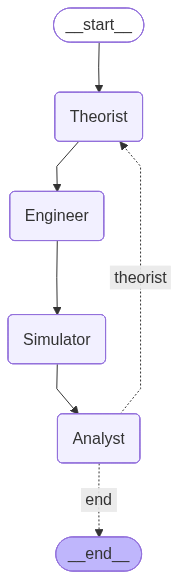

✅ 그래프 구조 시각화 완료

✅ Step 7 완료: KOKOA 에이전트 조립 끝!
   - MemorySaver가 활성화되었습니다. 이제 실험을 중단했다 재개할 수 있습니다.


In [54]:
# 1. 라우팅 로직 (Routing Logic)
# Analyst의 평가 결과(status)에 따라 다음 행동을 결정하는 '신호등' 함수입니다.
def router(state: AgentState):
    status = state["status"]
    
    # 목표 달성 시 종료
    if status == "FINISH":
        print("🎉 [System] 연구 목표 달성! 종료합니다.")
        return "end"
    
    # 실패하거나 개선이 필요하면 다시 Theorist로 돌아가서 가설/계획 수정
    elif status == "RETRY":
        print("🔄 [System] 결과 불충분. Theorist에게 피드백 전달 및 재시도...")
        return "theorist"
        
    # 결과가 더 나빠졌을 때 (추후 구현: 체크포인트 롤백 로직 추가 가능)
    elif status == "ROLLBACK":
        print("⏪ [System] 성능 열화 감지. 전략 수정 요청...")
        return "theorist"
    
    else:
        return "theorist"

# 2. 그래프 뼈대 생성
workflow = StateGraph(AgentState)

# 3. 노드(부품) 등록
workflow.add_node("Theorist", theorist_node)
workflow.add_node("Engineer", engineer_node)
workflow.add_node("Simulator", simulator_node)
workflow.add_node("Analyst", analyst_node)

# 4. 엣지(Edge) 연결 - 기본 흐름
# Theorist(생각) -> Engineer(코딩) -> Simulator(실험) -> Analyst(평가)
workflow.add_edge("Theorist", "Engineer")
workflow.add_edge("Engineer", "Simulator")
workflow.add_edge("Simulator", "Analyst")

# 5. 조건부 엣지 (Conditional Edge) - 순환 흐름
# Analyst의 평가(router 결과)에 따라 갈림길이 나뉩니다.
workflow.add_conditional_edges(
    "Analyst",          # 출발지
    router,             # 길잡이 함수
    {                   # 함수 반환값 vs 도착지 매핑
        "theorist": "Theorist", # 다시 생각하러 감 (Loop)
        "end": END              # 종료
    }
)

# 6. 시작점 설정
workflow.set_entry_point("Theorist")

# 7. 체크포인터(기억 저장소) 설정
# 이것이 있어야 에이전트가 "실패했던 시도"를 기억하고, 컴퓨터가 꺼져도 복구됩니다.
memory = MemorySaver()

# 8. 최종 컴파일 (Application 생성)
# interrupt_before 옵션을 쓰면 특정 노드 실행 전에 무조건 멈추게 할 수 있습니다 (HITL용).
# 여기서는 일단 자동으로 돌리되, 필요하면 ["Engineer"] 등을 추가할 수 있습니다.
app = workflow.compile(checkpointer=memory)

# --- 시각화 (선택 사항: 그래프 구조 확인) ---
try:
    from IPython.display import Image, display
    # Mermaid 다이어그램으로 흐름도 출력
    display(Image(app.get_graph().draw_mermaid_png()))
    print("✅ 그래프 구조 시각화 완료")
except Exception:
    print("ℹ️ 시각화 라이브러리(pygraphviz 등)가 없으므로 그림 출력은 건너뜁니다. (동작엔 문제 없음)")

print("\n✅ Step 7 완료: KOKOA 에이전트 조립 끝!")
print("   - MemorySaver가 활성화되었습니다. 이제 실험을 중단했다 재개할 수 있습니다.")

실행 및 HITL 루프 테스트


In [55]:
import uuid

# 1. 실험 설정 (Project Configuration)
project_id = str(uuid.uuid4())[:8] # 고유 실험 ID 생성
thread_config = {"configurable": {"thread_id": project_id}}

# 초기 목표 설정 (가상의 고체전해질 연구 주제)
initial_goal = """
**Objective**: Optimize the ionic conductivity of a 2D lattice model representing a solid electrolyte.
**Target**: Achieve conductivity > 5.0e-3 S/cm.
**Constraints**:
- Use a 20x20 grid (for speed).
- Consider vacancy hopping mechanism.
- Start with a simple random walk model and improve it.
"""

# 초기 상태 생성
initial_state = create_initial_state(initial_goal)

print(f"🚀 KOKOA 에이전트 시동 (Project ID: {project_id})")
print(f"🎯 연구 목표: {initial_goal.strip().splitlines()[1]}")
print("="*60)

# 2. 에이전트 실행 루프 (Autonomous Loop)
# stream()을 사용하여 각 단계(Node)가 실행될 때마다 결과를 실시간으로 출력합니다.

try:
    for event in app.stream(initial_state, thread_config):
        # 현재 실행된 노드의 이름과 결과 추출
        for node_name, node_output in event.items():
            print(f"\n📍 [{node_name}] 완료")
            
            # 노드별 주요 정보 출력
            if node_name == "Theorist":
                print(f"   💡 가설: {node_output.get('hypothesis', '')[:100]}...")
            elif node_name == "Engineer":
                print(f"   💾 코드 작성됨 ({len(node_output.get('python_code', ''))} bytes)")
            elif node_name == "Simulator":
                result = node_output.get("simulation_output")
                if result:
                    print(f"   🧪 결과: Success={result.is_success}, Cond={result.conductivity}")
            elif node_name == "Analyst":
                status = node_output.get("status")
                print(f"   📊 판단: {status} (오차율: {node_output.get('current_error_rate', 0):.2f}%)")
                
                # [HITL 시나리오] Analyst가 'RETRY'를 외치면 사용자에게 개입 기회를 줌
                # (실제로는 여기서 input()을 받아 멈출지 결정할 수 있음)
                if status == "RETRY":
                    print("   ⚠️ [Human Insight Needed] Analyst가 재시도를 요청했습니다.")
                    # 여기서 break를 하면 '일시 정지'가 됩니다.
                    # break 

    print("\n" + "="*60)
    print("🏁 실험 종료. 최종 상태가 저장되었습니다.")

except Exception as e:
    print(f"\n🚨 시스템 에러 발생: {e}")

# 3. [HITL 테스트] 중단된 지점에서 다시 시작하기 (Resuming)
# 만약 위에서 에러가 나거나 멈췄더라도, MemorySaver 덕분에 기억이 살아있습니다.

print("\n🔍 [HITL Test] 상태 점검 및 개입")
current_state = app.get_state(thread_config)

if current_state.values:
    last_step = current_state.values.get("research_log", [])[-1]
    print(f"📝 마지막 기록: {last_step}")
    
    # 예시: 사용자가 강제로 피드백을 주입하여 방향을 트는 경우
    print("🔧 사용자 개입: '온도를 높여보라'는 힌트를 주입합니다.")
    
    # 상태 업데이트 (State Update)
    app.update_state(
        thread_config,
        {"user_feedback": "Try increasing the temperature variable in the simulation to boost conductivity."}
    )
    
    print("▶️ 개입 반영 후 재실행 (Next Loop)...")
    # None을 입력으로 주면 멈춘 곳(또는 수정된 상태)에서 다시 시작합니다.
    # for event in app.stream(None, thread_config):
    #     for node_name, _ in event.items():
    #         print(f"   📍 [{node_name}] 재실행 완료")

else:
    print("⚠️ 저장된 상태가 없습니다. (첫 실행이 완료되었거나 초기화됨)")

🚀 KOKOA 에이전트 시동 (Project ID: a2916903)
🎯 연구 목표: **Target**: Achieve conductivity > 5.0e-3 S/cm.
💡 [Theorist] RAG 검색 및 가설 수립 중...

🚨 시스템 에러 발생: name 'knowledge_retriever' is not defined

🔍 [HITL Test] 상태 점검 및 개입
📝 마지막 기록: --- Reserch Log Started ---
🔧 사용자 개입: '온도를 높여보라'는 힌트를 주입합니다.
▶️ 개입 반영 후 재실행 (Next Loop)...
